In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from gaia_download import vari_class, vari_short_timescale
import gPhoton
from download_isochrone import load_isochrone
from extinction import add_colors_and_abs_mag
import plotly.graph_objects as go
from simbad_download import fetch_catalog_id
import pyvo as vo

from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord, ICRS
import astropy.units as u
from download_lightcurves import download_dr3_lightcurve

Configuration file not found:

    /home/mjablons/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


In [2]:
CLUSTER_NAME: str = 'Berkeley 36'

In [3]:
sources = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}.csv')
clustered = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_clustered.csv')
found = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_found.csv')
isochrone = load_isochrone(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_isochrone.dat')

In [4]:
bss_candidates = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_bss.csv')
yss_candidates = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_yss.csv')

bss_candidates = add_colors_and_abs_mag(bss_candidates)
yss_candidates = add_colors_and_abs_mag(yss_candidates)

In [ ]:
plt.hist(clustered.G_abs_error, bins=50)

In [13]:
np.quantile(bss_candidates.G_abs_error, [.16])

array([0.66457917])

In [14]:
bss_candidates = bss_candidates[bss_candidates['G_abs_error']<np.quantile(bss_candidates.G_abs_error, [.16])[0]]
yss_candidates = yss_candidates[yss_candidates['G_abs_error']<np.quantile(bss_candidates.G_abs_error, [.16])[0]]

In [16]:
%matplotlib notebook

<IPython.core.display.Javascript object>


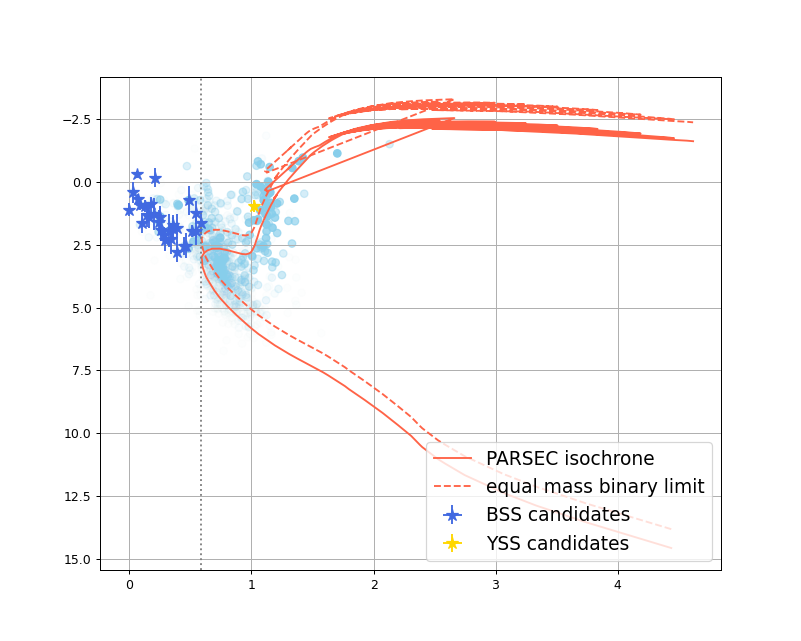

In [19]:
plt.figure(figsize=(10, 8))
TO_COLOR = np.min(isochrone[:, 0])
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue', alpha=clustered['occurences'])
plt.errorbar(bss_candidates['BP-RP'], bss_candidates['G_abs'],
             xerr=bss_candidates['BP-RP_error'], yerr=bss_candidates['G_abs_error'],
             color='royalblue', fmt='*', zorder=2, label='BSS candidates', markersize=10.)
plt.errorbar(yss_candidates['BP-RP'], yss_candidates['G_abs'],
             xerr=yss_candidates['BP-RP_error'], yerr=yss_candidates['G_abs_error'],
             color='gold', fmt='*', zorder=2, label='YSS candidates', markersize=10.)

plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', label='PARSEC isochrone')
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', label='equal mass binary limit',
         linestyle='--')
plt.axvline(x=TO_COLOR, color='gray', linestyle='dotted')
plt.gca().invert_yaxis();
plt.legend(fontsize=15, loc='lower right');
plt.grid();

In [18]:
yss_candidates = yss_candidates[(yss_candidates['G_abs']>0) & (yss_candidates['BP-RP']<1.2)]

In [20]:
%matplotlib notebook

<IPython.core.display.Javascript object>


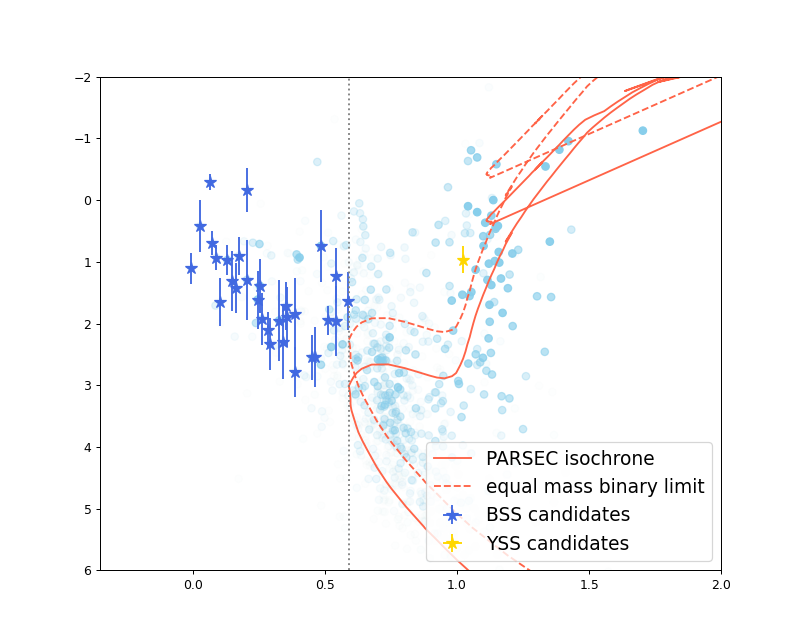

In [25]:
plt.figure(figsize=(10, 8))
TO_COLOR = np.min(isochrone[:, 0])
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue', alpha=clustered['occurences'])
plt.errorbar(bss_candidates['BP-RP'], bss_candidates['G_abs'],
             xerr=bss_candidates['BP-RP_error'], yerr=bss_candidates['G_abs_error'],
             color='royalblue', fmt='*', zorder=2, label='BSS candidates', markersize=10.)
plt.errorbar(yss_candidates['BP-RP'], yss_candidates['G_abs'],
             xerr=yss_candidates['BP-RP_error'], yerr=yss_candidates['G_abs_error'],
             color='gold', fmt='*', zorder=2, label='YSS candidates', markersize=10.)

plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', label='PARSEC isochrone')
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', label='equal mass binary limit',
         linestyle='--')
plt.axvline(x=TO_COLOR, color='gray', linestyle='dotted')
plt.gca().invert_yaxis();
plt.legend(fontsize=15, loc='lower right');
plt.gca().set_xlim(-.35, 2.);
plt.gca().set_ylim(6., -2.);

# BSS variability

In [26]:
bss_candidates = add_colors_and_abs_mag(bss_candidates).drop_duplicates(subset=['source_id'])

/home/maya/Workspace/gaia-blue/extinction.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sources['BP_error'] = (2.5/(np.log(10)*sources['phot_bp_mean_flux_over_error'])).astype(np.float32)
/home/maya/Workspace/gaia-blue/extinction.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sources['RP_error'] = (2.5/(np.log(10)*sources['phot_rp_mean_flux_over_error'])).astype(np.float32)
/home/maya/Workspace/gaia-blue/extinction.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [32]:
len(bss_candidates)

30

In [37]:
certain_bss = bss_candidates[bss_candidates.occurences>=.84]

In [38]:
certain_bss.head()

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,label,occurences,outlier
4,4755,1636148068921376768,Gaia DR3 3032950980678835968,3032950980678835968,1502393892,2016.0,109.101374,0.030782,-13.236333,0.033324,...,0.899704,0.580491,0.254093,0.003940,1.388547,0.435087,0.063805,1,0.94,-1
16,5290,1636148068921376768,Gaia DR3 3032953729457867392,3032953729457867392,598951956,2016.0,109.101899,0.030714,-13.159109,0.033536,...,0.800149,0.516258,0.246143,0.005482,1.610747,0.469509,0.057771,1,0.85,-1
28,5029,1636148068921376768,Gaia DR3 3032952595586520192,3032952595586520192,1502444111,2016.0,109.125765,0.028472,-13.214739,0.029959,...,0.814184,0.525314,0.485230,0.003193,0.741439,0.578633,0.079034,0,0.92,-1


In [28]:
bss_var = bss_candidates[bss_candidates.phot_variable_flag=='VARIABLE']

In [29]:
bss_var

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,label,occurences,outlier


In [76]:
np.any(bss_candidates.non_single_star)

False

In [39]:
bss_candidates[bss_candidates.ruwe>1.4][['source_id', 'has_epoch_photometry', 'ruwe', 'excess', 'occurences']]

,source_id,has_epoch_photometry,ruwe,excess,occurences


In [40]:
np.any(bss_candidates.has_epoch_rv)

False

In [41]:
bss_rv_amplitude = bss_candidates.dropna(subset=['rv_amplitude_robust'])
bss_rv_amplitude[['source_id', 'radial_velocity', 'rv_amplitude_robust', 'radial_velocity_error']]

,source_id,radial_velocity,rv_amplitude_robust,radial_velocity_error


# YSS variability

In [46]:
yss_var = yss_candidates[yss_candidates.phot_variable_flag=='VARIABLE'].drop_duplicates(subset=['source_id'])

In [47]:
yss_var

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,label,occurences,outlier


In [48]:
yss_var.has_epoch_photometry

Series([], Name: has_epoch_photometry, dtype: bool)

In [49]:
for _, bss in yss_var.iterrows():
    print(f'{bss.source_id}: {bss.ra}, {bss.dec}:')
    gPhoton.gFind(skypos=[bss.ra, bss.dec])
    print()

In [50]:
yss_candidates.non_single_star

45    0
Name: non_single_star, dtype: int64

In [51]:
yss_candidates.ruwe

45    0.964822
Name: ruwe, dtype: float64

In [52]:
yss_rv_amplitude = yss_candidates.dropna(subset=['rv_amplitude_robust'])
yss_rv_amplitude[['source_id', 'rv_amplitude_robust', 'radial_velocity_error', 'occurences']]

,source_id,rv_amplitude_robust,radial_velocity_error,occurences


In [53]:
np.abs(yss_rv_amplitude.rv_amplitude_robust)>=6*yss_rv_amplitude.radial_velocity_error

Series([], dtype: bool)

In [55]:
yss_candidates

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,label,occurences,outlier
45,5518,1636148068921376768,Gaia DR3 3032954828969726720,3032954828969726720,1194029901,2016.0,109.311799,0.019216,-13.201291,0.019185,...,0.690023,0.445204,1.024506,0.001844,0.962999,0.224148,0.071818,2,0.01,1


In [56]:
len(bss_candidates)

30

In [57]:
len(yss_candidates)

1

In [58]:
yss_candidates.occurences.value_counts()

0.01    1
Name: occurences, dtype: int64

In [59]:
len(bss_candidates.drop_duplicates(subset=['source_id']))

30

In [60]:
len(yss_candidates)

1

In [61]:
bss_candidates.to_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_bss.csv')
yss_candidates.to_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_yss.csv')